In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sidduling\Downloads\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


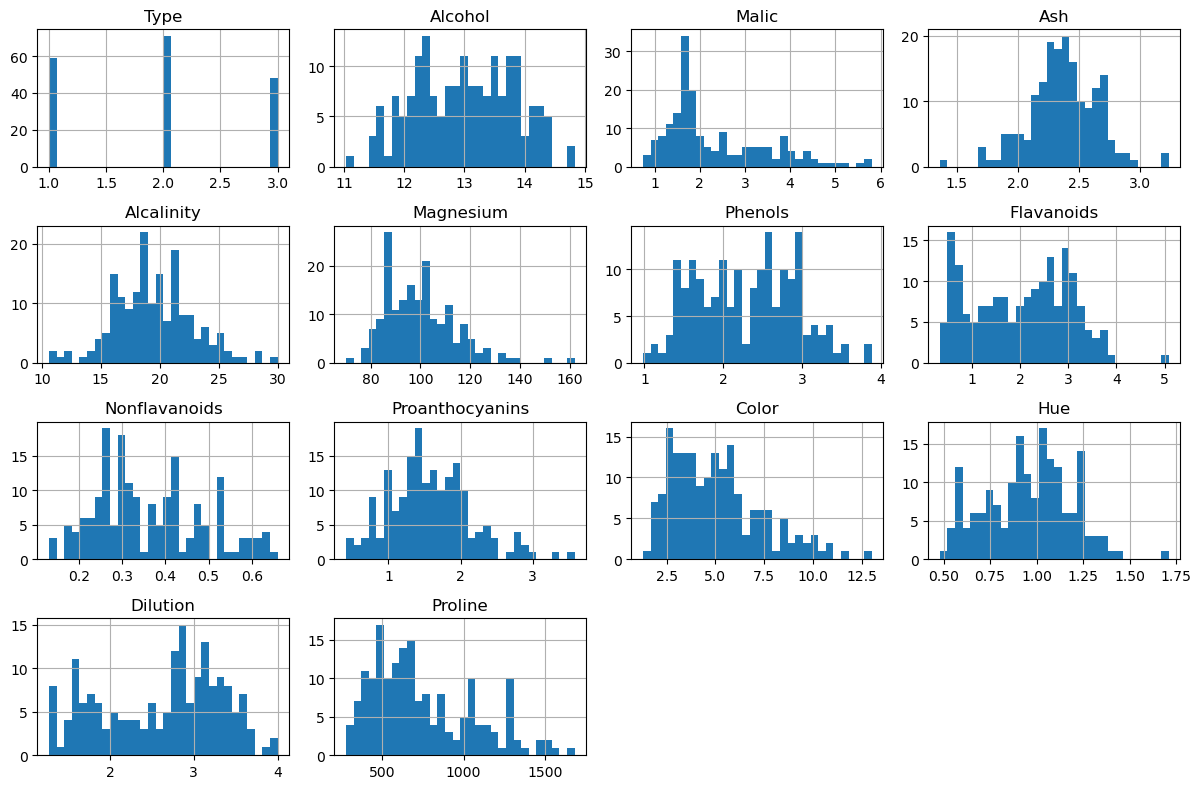

In [5]:
# 2. Distribution of features
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

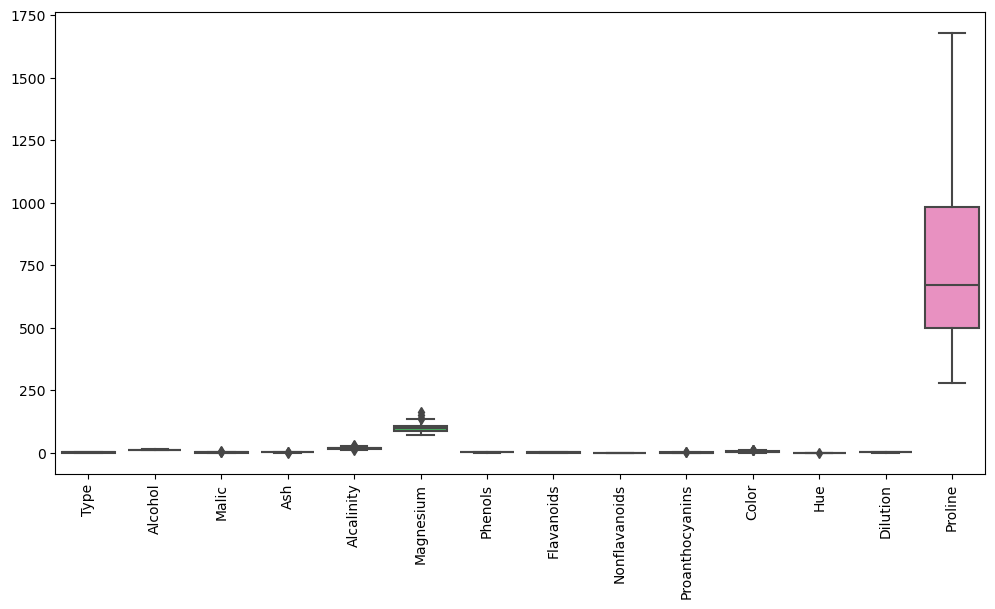

In [6]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


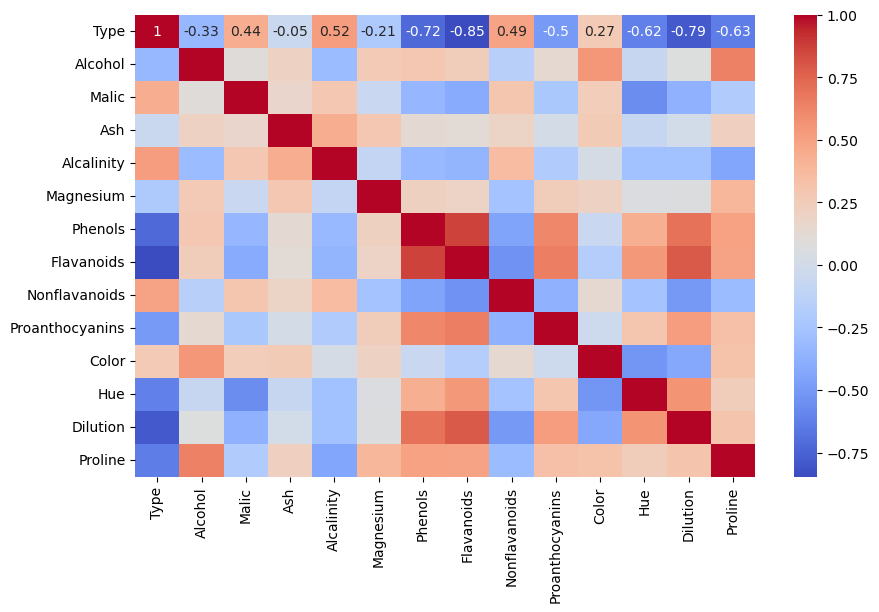

In [7]:
# 3. Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [8]:
from sklearn.preprocessing import  StandardScaler


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


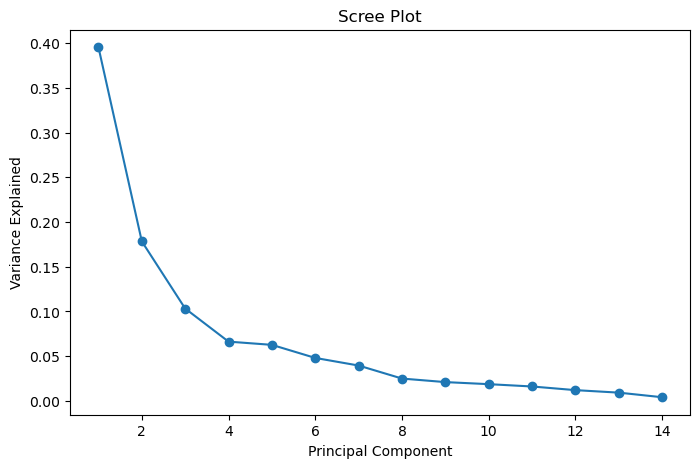

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()


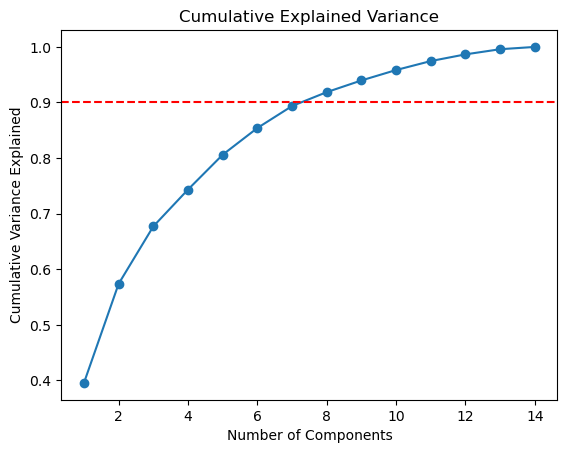

In [13]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

In [14]:
pca_opt = PCA(n_components=2)
X_pca = pca_opt.fit_transform(X_scaled)
print("Explained variance (2 PCs):", sum(pca_opt.explained_variance_ratio_))

Explained variance (2 PCs): 0.5737874490085583


In [15]:
from sklearn.cluster import KMeans

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
# K-Means on original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(X_scaled)

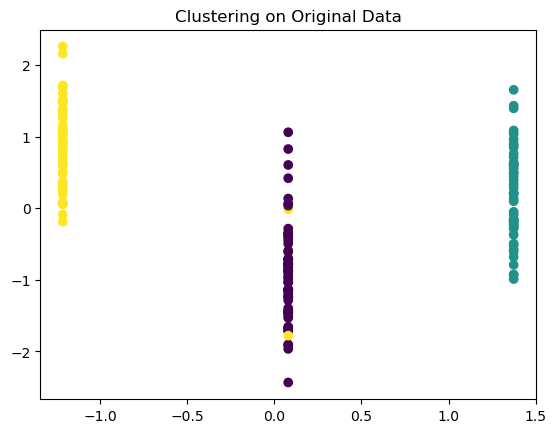

In [18]:
# Visualization (using first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_orig, cmap='viridis')
plt.title("Clustering on Original Data")
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_orig = silhouette_score(X_scaled, clusters_orig)
db_orig = davies_bouldin_score(X_scaled, clusters_orig)
print(f"Original Data - Silhouette Score: {silhouette_orig:.3f}, DB Index: {db_orig:.3f}")

Original Data - Silhouette Score: 0.306, DB Index: 1.316


In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [21]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

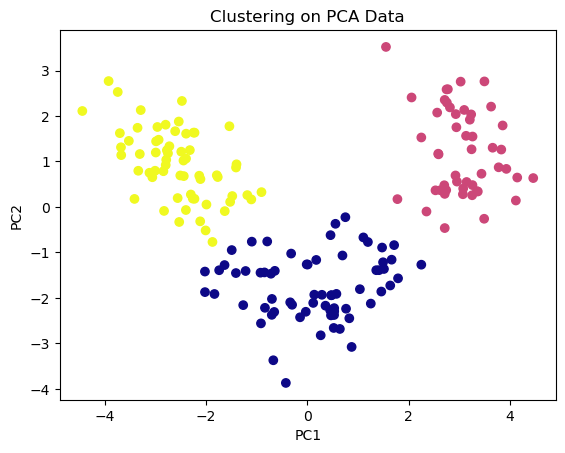

In [22]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='plasma')
plt.title("Clustering on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [23]:
silhouette_pca = silhouette_score(X_pca, clusters_pca)
db_pca = davies_bouldin_score(X_pca, clusters_pca)

print(f"PCA Data - Silhouette Score: {silhouette_pca:.3f}, DB Index: {db_pca:.3f}")

PCA Data - Silhouette Score: 0.602, DB Index: 0.540


In [24]:
comparison_df = pd.DataFrame({
    "Data Type": ["Original", "PCA-Transformed"],
    "Silhouette Score": [silhouette_orig, silhouette_pca],
    "Davies-Bouldin Index": [db_orig, db_pca]
})

In [25]:
print(comparison_df)

         Data Type  Silhouette Score  Davies-Bouldin Index
0         Original          0.306484              1.315708
1  PCA-Transformed          0.602442              0.539708
